In [1]:
#Natural Language Processing
#Using NLTK

import webbrowser
site = "http://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/NLP%20%28Natural%20Language%20Processing%29.ipynb"
webbrowser.open_new(site)

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#For Training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
# Part 1: Data
messages = [line.rstrip() for line in open('SMSSpamCollection')] #creates a list, takes out blank space to the right in each line
print len(messages)                                      

5574


In [3]:
# Visualize: Print out 1st 10 text messages
for message_no, message in enumerate(messages[:10]): #Cool trick, numbers each message. 'message_no' iterates through
    #'enumerate' while 'message' iterates through 'messages'
    # the numbers are not part of the file, just from the enumerate call
    print message_no, message
    print '\n' #adds an extra line space

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [2]:
# Use pandas to parse through data
# Important to know that it is 'tab' seperated
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ["label", "message"]) 
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Part 2: Exploratory data analysis
messages.describe() #Cool pandas feature

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe() #Seperated using unique labels

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [3]:
# Feature Engineering. 
# Create features that will help the classification process

# Adding a 'length' column
messages['length'] = messages['message'].apply(len) #applies the method to the column #cool trick
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
#Gets info about length. Avg is doubled for 'spam'
messages.groupby('label').describe()

length
label                   
ham   count  4825.000000
      mean     71.558964
      std      58.459702
      min       2.000000
      25%      33.000000
      50%      52.000000
      75%      93.000000
      max     910.000000
spam  count   747.000000
      mean    139.119143
      std      28.998900
      min      13.000000
      25%     133.000000
      50%     149.000000
      75%     158.000000
      max     224.000000

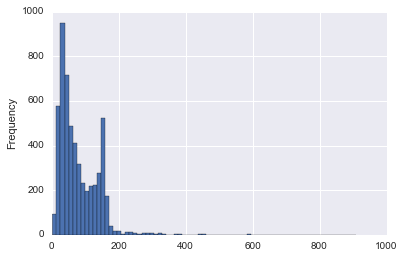

In [28]:
# Visualize using new feature 'length'
messages['length'].plot(bins = 75, kind = 'hist')
#messages['length'].hist(bins = 75,) also works just fine

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [22]:
#Find the message that has 910 characters
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [24]:
#Isolate message only
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D256A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010F10048>], dtype=object)

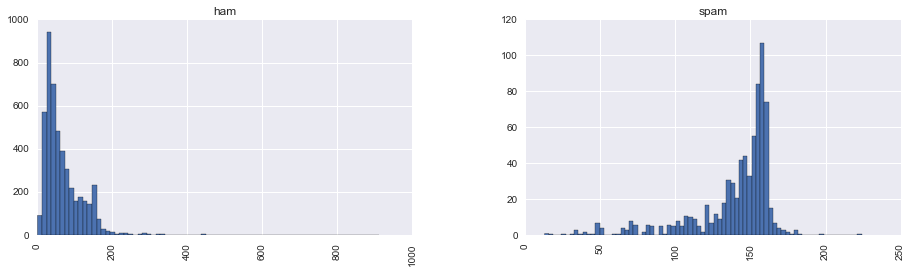

In [34]:
# Visualize using graphs for both 'ham' and 'spam'
messages.hist(column = 'length', by = 'label', bins = 75, figsize = (15,4)) #figsize changes graph size

In [38]:
#Gets info about length. Avg is doubled for 'spam'
messages.groupby('label').describe()

length
label                   
ham   count  4825.000000
      mean     71.558964
      std      58.459702
      min       2.000000
      25%      33.000000
      50%      52.000000
      75%      93.000000
      max     910.000000
spam  count   747.000000
      mean    139.119143
      std      28.998900
      min      13.000000
      25%     133.000000
      50%     149.000000
      75%     158.000000
      max     224.000000

In [ ]:
#Part 3: Text pre-processing
#Text is strings. We need numerical feature vector format for computation
# Will use Bag of Words 

In [17]:
#Example. This extracts punctuation from the string
# "string.punctuation" shows all punctuation with the 'import string' command
mess = 'Sample message! Notice: it has punctuation.'
nopunc = [char for char in mess if char not in string.punctuation]
#Join the string back
nopunc = ''.join(nopunc)
nopunc


'Sample message Notice it has punctuation'

In [20]:
#Example: Remove stopwords (already imported)
#Stopwords are high-frequency words that usually have little lexical content
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [21]:
#View 'nopunc' as a list
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [26]:
#Remove stopwords from list ('it' and 'has')
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [4]:
#Create a function based on examples to be applied to 'messages'
def text_process(mess):
    """
    Takes in a string and does the following 3 things:
    1. Extracts punctuation
    2. Remove all stopwords
    3. Returns clean text
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [5]:
#Check to make sure working
print messages.head()
messages['message'].head().apply(text_process)

  label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
# Part 4: Vectorization
# need to convert each message into a vector for scikit learn to work with

#CountVectorizer converts a collection of text documents to a matrix of token counts

#Will also use TF-IDF (Term Frequency-Inverse Document Frequency): evaluates the weight of text (importance)

#TF takes the frequency of words in each message
#IDF takes the weight of each word across the entire dataset (See below)
'''
IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat 
appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. 
Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
'''

In [6]:
bow_transformer = CountVectorizer(analyzer = text_process) #look more into what analyzer does
bow_transformer.fit(messages['message']) #magic!
print len(bow_transformer.vocabulary_) #Vocabulary is part of CountVectorizer attributes

C:\Users\GregH\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


11425


In [11]:
#Example
message4 = messages['message'][3] #good skill to know. Outputs only the 4th message in the 'message' column
print message4

#See vectorized implementation
bow4 = bow_transformer.transform([message4])
print bow4
print bow4.shape

#This shows that there are 7 words in message4 after removing stopwords. Two appear twice, the rest once.
# U dun say so early hor... U c already then say...

#Each number corresponds with a unique word
#11,425 unique words

U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [31]:
#Which words appear twice?
print bow_transformer.get_feature_names()[4068]
print bow_transformer.get_feature_names()[9554]

#change the numbers to get different words throughout entire dataset
print bow_transformer.get_feature_names()[10000]

U
say
split


In [8]:
# Transform entire DataFrame
messages_bow = bow_transformer.transform(messages['message']) #stores in compressed sparse row format
print 'Shape of Sparse Matrix: ', messages_bow.shape #number of messages x number of unique words
print 'Amount of Non-Zero occurences: ', messages_bow.nnz
print 'Sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

C:\Users\GregH\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
Sparsity: 0.08%


In [12]:
tfidf_transformer = TfidfTransformer().fit(messages_bow) #Magic

#view our 4th message and see the weights
tfidf4 = tfidf_transformer.transform(bow4)
print tfidf4

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [16]:
#Check out weight on each word
print tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]
print tfidf_transformer.idf_[bow_transformer.vocabulary_['say']]
print tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

3.28005242674
5.2312396329
8.5270764989


In [21]:
#Transform Entire Bag of Words Corpus into TF-IDF at once
messages_tfidf = tfidf_transformer.transform(messages_bow)
print messages_bow.shape #Number of messages by number of words


(5572, 11425)


In [ ]:
#There are many ways the data can be preprocessed and vectorized. 
#These steps involve feature engineering and building a "pipeline"

In [22]:
#Part 5: Training
#Now that we've vectorized we can train the model.
#We will use Naive Bayes

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [28]:
print 'Predicted', spam_detect_model.predict(tfidf4)
print 'Predicted', spam_detect_model.predict(tfidf4)[0]

print '\n', 'Expected', messages['label'][3]

Predicted ['ham']
Predicted ham

Expected ham


In [ ]:
#The problem is that we haven't split up our data into training and testing

#We can set up a Pipeline to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps
#in processing the data...1)feature selection 2)normalization 3) classification

#Only have to call 'fit' and 'predict' once

#Check out http://scikit-learn.org/stable/modules/pipeline.html

In [13]:
list = [3,5,7,9,12]
for num, l in enumerate(list):
    print num,l

0 3
1 5
2 7
3 9
4 12


In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True